# Visualización de los datos de BraTS Glioma y Meningioma.


En este notebook haremos algunas visualizaciones relevantes para entender la naturaleza de los datos y el problema que tenemos.

## Contexto

**Poner contexto de ambos problemas aquí**

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Datasets TFG

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets TFG


## Visualizaciones

### 1. Distribuciones generales de los datos.

**¿Cuántos datos hay por cada tipo de tumor?**

In [ ]:
# Comando para listar los elementos del directorio actual detalladamente
comando_gliomas = ["ls", "gliomas/"]
comando_meningiomas = ["ls", "meningiomas/"]

# Ejecutar el comando, capturar la salida dividiendola en líneas
lista_gliomas = subprocess.run(comando_gliomas, stdout=subprocess.PIPE, text=True).stdout.split('\n')
lista_meningiomas = subprocess.run(comando_meningiomas, stdout=subprocess.PIPE, text=True).stdout.split('\n')


,Tipo de Tumor,Nº Instancias
0,Meningiomas,1000
1,Gliomas,1251


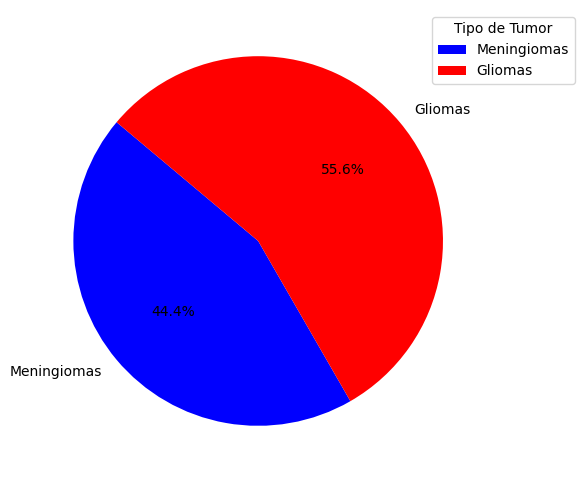

In [ ]:
# Datos
tamaños = [len(lista_meningiomas) -1, len(lista_gliomas) -1]
etiquetas = ['Meningiomas', 'Gliomas']
colores = ['blue', 'red']

# Crear el gráfico de círculos
plt.figure(figsize=(6, 6))
plt.pie(tamaños, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)

# Añadir leyenda
plt.legend(title="Tipo de Tumor", loc="upper right", bbox_to_anchor=(1.2, 1))

# Datos
tabla_info = {
    'Tipo de Tumor': etiquetas ,
    'Nº Instancias': tamaños,
}

# Mostrar el gráfico y tabla
display(pd.DataFrame(tabla_info))
plt.show()

**¿Cuántas MRI existen por paciente?**

Como sabemos existe al menos una MRI por paciente. Sin embargo, es útil saber si algunos pacientes tienen un mayor número de escáneres MRI a lo largo del tiempo. En otras palabras, si

Para ello, contaremos los archivos que tengan el mismo número de identificador.
En el siguiente gráfico de barras y tabla contaremos cuántos pacientes existen con qué número de escáneres de MRI.

In [ ]:
# Creación de una lista de la cantidad de escáneres de cada paciente.

def contar_MRI_paciente(lista):
  paciente_MRI = []
  num_MRI = 1

  for i in range(len(lista)-1):
    if lista[i][10:15] == lista[i+1][10:15]:
      num_MRI +=1
    else:
      paciente_MRI.append(num_MRI)
      num_MRI = 1

  return paciente_MRI

# Transformar la lista anterior a una lista de la cantidad de pacientes según escáneres hechos.

contar_pacientes_MRI = lambda lista: [lista.count(i) for i in range(1, max(lista) + 1)]

,Tipo de Tumor,Pacientes con 1 MRI,Pacientes con 2 MRI,Pacientes con 3 MRI,Pacientes con 4 MRI,Pacientes con 5 MRI,Pacientes con 6 MRI,Pacientes con 8 MRI,Total de pacientes
0,Meningiomas,928,4,2,2,4,1,3,1133
1,Gliomas,1015,118,0,0,0,0,0,944


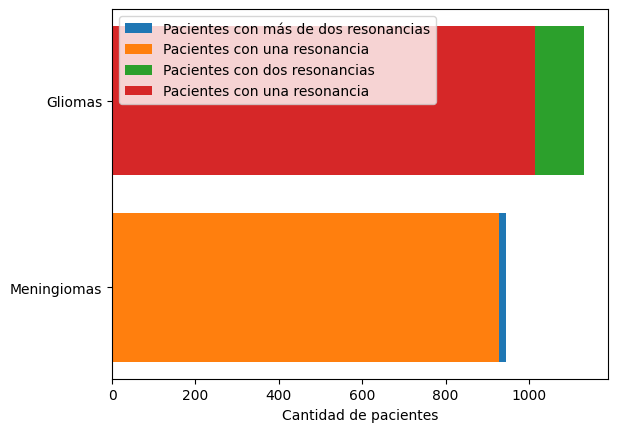

In [ ]:
count_gliomas = contar_pacientes_MRI(contar_MRI_paciente(lista_gliomas))
count_meningiomas = contar_pacientes_MRI(contar_MRI_paciente(lista_meningiomas))

pacientes_glioma = sum(count_gliomas)
pacientes_meningioma = sum(count_meningiomas)

plt.barh(etiquetas[0], pacientes_meningioma, label='Pacientes con más de dos resonancias')
plt.barh(etiquetas[0], count_meningiomas[0], label='Pacientes con una resonancia')

plt.barh(etiquetas[1], pacientes_glioma, label='Pacientes con dos resonancias')
plt.barh(etiquetas[1], count_gliomas[0], label='Pacientes con una resonancia')

# Datos
tabla_pacientes = {
    'Tipo de Tumor': etiquetas ,
    'Pacientes con 1 MRI': [count_meningiomas[0], count_gliomas[0]],
    'Pacientes con 2 MRI': [count_meningiomas[1], count_gliomas[1]],
    'Pacientes con 3 MRI': [count_meningiomas[2], 0],
    'Pacientes con 4 MRI': [count_meningiomas[3], 0],
    'Pacientes con 5 MRI': [count_meningiomas[4], 0],
    'Pacientes con 6 MRI': [count_meningiomas[5], 0],
    'Pacientes con 8 MRI': [count_meningiomas[7], 0],
    'Total de pacientes': [pacientes_glioma, pacientes_meningioma],
}

# Mostrar el gráfico y tabla
display(pd.DataFrame(tabla_pacientes))

plt.legend(loc='upper left')
plt.xlabel('Cantidad de pacientes')
plt.show()

### 2. Visualizando las imágenes y su segmentación

A continuación, exploraremos las imágenes de los datos $X$ : las imágenes de las resonancias. Seleccionaremos algunos ejemplos representativos Adicionalmente, exploraremos las etiquetas $Y$ : las segmentaciones. Estas se podrán observar junto la imagen original superpuestas a esta.

Para el manejo de los archivos NIfTI usaremos la librería **nibabel**.

In [ ]:
import nibabel as nib
import os
import glob

### 3. Localización de los tumores en el conjunto de entrenamiento


 Se mostrará un único mapa de calor indicando cuántos ejemplos del conjunto de entrenamiento para ambos tipos (glioma y meningioma) tienen ese pixel segmentado. De esta forma podremos visualizar las tendencias mayoritarias sobre las zonas del cerebro de los tumores de nuestro dataset.

### 4. Pequeña Interfaz creada en local

Respecto las imágenes sólo hemos creado pequeñas visualizaciones de ejemplos concretos. En local debido a que Google Colab no soporta el uso de librerías especializadas en GUI, crearemos una pequeña interfaz gráfica con la cual podamos visualizar cualquier imagen del dataset e incoporé la funcionalidad de visualizado de los experimentos mostrados en este notebook.
